Team Members: William Bolder, Jongin Choi, Gianna Delorenzo, Naman Joshi, Ryan Kaye, and Darren Zhu  
Course: DS 220   
Instructor: Professor Fonkam  
Date: December 9, 2023
# Rental Data Analysis of US Cities  
## **Introduction**
This project aims to analyze a real estate data set consisting of rent prices for major US cities between January 2015 to October 2023. The data set includes information on the Region Name (city), State, County Name, rent, etc. This data set was obtained from https://www.zillow.com/research/data/.  
First, we will import pandas and matplotlib, and load the zillow data set.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('City_zori_uc_sfrcondomfr_sm_month.csv')

### **Question 1: Which state has the highest average rent?**   
1. To find the state with the highest average rent and also the corresponding rent value, first, identify the most recent date (`columns[-1]`) from the data set, which is October 2023.  
2. Second, initialize a dictionary to hold the total rent values for each state.  
3. Then, since we want to perform operations on each row of the data, we will use `iterrows()` in the for loop to iterate over each data frame row, which will yield an index and row data.  
4. The for loop will get the state and rent. If the rent is already in the dictionary `rent_sums`, it will add the rent value, else, it will initialize a new value.

In [2]:
most_recent = data.columns[-1]

# initialize dictionary
rent_sums = {}

# for each row in the data...
for index, row in data.iterrows():
    # get state and most recent rent
    state = row['State']
    rent = row[most_recent]

    # if the rent is already in dictionary add
    if state in rent_sums:
        rent_sums[state] += rent
        
    # else initialize
    else:
        rent_sums[state] = rent

5. Once the rent sum of each state is calculated, calculate the average rent for each state.
6. First, count the number of unique cities for each state with `value_counts()` and then initialize a dictionary to hold the average state rents.  
7. Then, in a for loop, for each state in the rent_sums dictionary, calculate the total rent, get the count of unique cities, calculate the average rent, and store the average rent in the `avg_state_rent` dictionary.
8. For the final step, the state (max key) and the corresponding rent value, then print out the results.


In [3]:
# count the number of unique "cities" for each state with value_counts()
state_rent_count = data['State'].value_counts()

# initialize dictionary
avg_state_rent = {}

# for each state in rent_sums...
for state in rent_sums:
    total_rent = rent_sums[state] # total rent for state
    city_count = state_rent_count[state] # get the count (number of cities) for state
    avg_rent = total_rent / city_count # calculate the average rent
    avg_state_rent[state] = avg_rent # store info in dictionary

# highest rent state and the average rent value
highest_rent_state = max(avg_state_rent, key = avg_state_rent.get)
highest_avg_rent = max(avg_state_rent.values())

print(f"The state with the highest average rent is {highest_rent_state} with an average rent of ${highest_avg_rent:.2f}")

The state with the highest average rent is NY with an average rent of $6153.50


### **Question 2: What state has the lowest average rent?**
1. Similar to question 1, in order to get the state with the lowest average rent and its corresponding rent, use the `min()` function to get the key (state) and lowest value (rent).
2. Print the state and rent.

In [4]:
lowest_rent_state = min(avg_state_rent, key = avg_state_rent.get)
lowest_avg_rent = min(avg_state_rent.values())

print(f"The state with the lowest average rent is {lowest_rent_state} with an average rent of ${lowest_avg_rent:.2f}")

The state with the lowest average rent is ND with an average rent of $936.70


### **Question 3: What are the top 5 US cities with the highest rent prices?**
1. To find the top 5 US cities with the highest rent prices, first use the pandas `sort_values()` to sort the data in descending order.
2. Then, use the data frame `head(5)` to retrieve the first 5 rows of the sorted data.
3. Finally, in a for loop using `iterrows()` again, print out only the `RegionName` (City), `State`, and the most recent rent price.

In [5]:
# sort data by most_recent in descending order
sort_data = data.sort_values(by=most_recent, ascending=False)

# get the top 5 using data frame head(5)
top_5_highest = sort_data.head(5)

print("The top 5 US cities with the highest rent prices are:")

# for each, only print RegionName, State, and rent
for index, row in top_5_highest.iterrows():
    print(f"{row['RegionName']}, {row['State']}: ${row[most_recent]:.2f}")


The top 5 US cities with the highest rent prices are:
Sagaponack, NY: $70166.50
Amagansett, NY: $66875.00
Bridgehampton, NY: $60000.00
Wainscott, NY: $45000.00
Water Mill, NY: $40000.00


### **Question 4: Are there noticeable patterns in the rent prices over the years?**  
1. This question is looking to find the overall percent change in rent price from the first record in 2015 to the most current data available (2023-10-31).  
2. First, we would calculate the percent change in rent for each city. The general formula to calculate percent change is ((final value - initial value) / initial value) * 100. In this case, the initial value would be `2015-01-31`.  
3. Then, calculate the overall change in rent for all cities. To do so, use `mean()` to calculate the average overall change in rent for all cities.
4. Print overall percent change.

In [6]:
# calculate the percent change in rent for each city
initial_rent = data['2015-01-31']
final_rent = data[most_recent]

percent_change_rent = ((final_rent - initial_rent) / initial_rent) * 100

# calculate the overall change in rent for all cities
overall_change = percent_change_rent.mean()

print(f"The overall percent change in rent for all cities is {overall_change:.2f}%")

The overall percent change in rent for all cities is 70.30%


### **Question 5: What is the change in average rent in State College, PA for the past year? And show the rent price trend for the past year in a chart.**
1. We want to calculate the change in average rent prices in State College, PA from `2022-10-31` to `2023-10-31` (most current data).  
2. First, locate the data for State College by using `loc[]`.  
3. Once the data is located, the rent data for `2022-10-31` and `2023-10-31` is extracted using `iloc[]`.
4. Now, calculate the percent change in rent and the rent amount change for State College.
5. Print percent change and average change.

In [7]:
# find the data for State College
state_college_info =  data.loc[data['RegionName'] == 'State College']

# extract data using .loc[]
rent_oct_2022 = state_college_info['2022-10-31'].iloc[0]
rent_current = state_college_info[most_recent].iloc[0]

# calculate percent change and rent amount change
pct_change_state_college = ((rent_current - rent_oct_2022) / rent_oct_2022) * 100
rent_change_state_college = rent_current - rent_oct_2022

print(f"The percent change in average rent in State College, PA from 2022-10-31 to 2023-10-31 is {pct_change_state_college:.2f}%")
print(f"The average change in rent is ${rent_change_state_college:.2f}")

The percent change in average rent in State College, PA from 2022-10-31 to 2023-10-31 is 3.58%
The average change in rent is $61.67


6. To create a chart, first, get the dates from 2022-10-31 to 2023-10-31 using negative indexing.
7. Then, get the data for the respective dates and convert to series using `squeeze()`.
8. Now, create a line plot, first by identifying the size and then plot the information and use 'o' as markers.
9. Finally, give the graph an appropriate title and axis names, and rotate the x axis labels by 90 degrees so it would fit and show the plot.

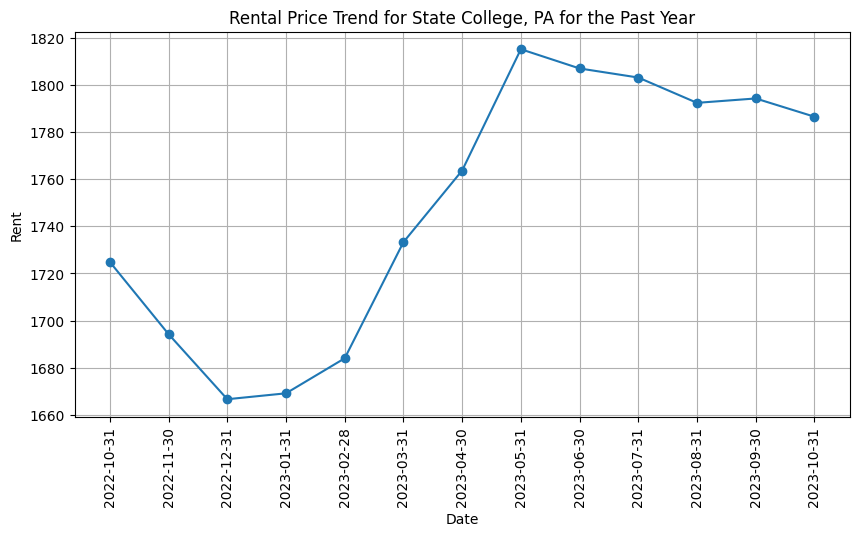

In [20]:
# get dates from 2022-10-31 to 2023-10-31 and get data and use squeeze to convert to series
dates = state_college_info.columns[-13:]
rent_sc = state_college_info.loc[:, dates].squeeze()

# create line plot
plt.figure(figsize=(10, 5))
plt.plot(dates, rent_sc, marker='o') # use 'o' as markers

# title and axis
plt.title('Rental Price Trend for State College, PA for the Past Year')
plt.xlabel('Date')
plt.ylabel('Rent')
plt.xticks(rotation=90) # rotate to fit
plt.grid(True) # add a grid

plt.show()

### **Question 6: What is a most expensive metropolitan area?** 
1. First, group the data by the column 'Metro' while selecting the column 'most_recent,' and obtain the average value by using `mean()`.
2. Identify the most expensive metro using `idxmax()`.
3. Identigy the morresponding corresponding highest rent using `max()`.
4. Print the state and rent.

In [9]:
# calculate the average rent for each metro
avg_metro = data.groupby('Metro')[most_recent].mean()

# most expensive metro and the average rent
most_expensive_metro = avg_metro.idxmax()
metro_highest_rent = avg_metro.max()

print(f"The most expensive metropolitan area is {most_expensive_metro}, with an average rent of ${metro_highest_rent:.2f}")

The most expensive metropolitan area is Glenwood Springs, CO, with an average rent of $10416.50


## **Results**
1. State with the highest average rent: NY, average rent in NY: $6,153.50. 
2. State with the lowest average rent: ND, average rent in ND: $936.70.  
3. Top 5 cities with the highest rent prices are:  
    1. Sagaponack, NY: $70,166.50  
    2. Amagansett, NY: $66,875.00  
    3. Bridgehampton, NY: $60,000.00  
    4. Wainscott, NY: $45,000.00  
    5. Water Mill, NY: $40,000.00     
4. The overall percent change in rent prices from 2015-01-31 to 2023-10-31 is 70.30%.  
5. Average change in rent in State College, PA from 2022-10-31 to 2023-10-31: 3.58% or $61.67 increase.
6. The most expensive metropolitan area is Glenwood Springs, CO with an average rent of $10,416.50.

### **Resources**
Here are some additional resources for further insight into the dataset provided by Zillow.  
1. **Average Rental Price in State College, PA & Market Trends** https://www.zillow.com/rental-manager/market-trends/state-college-pa/
2. **Rent Comparison Tool & Rental Market Trends Data** https://www.zillow.com/rental-manager/market-trends/ 

Users can adjust some factors such as the number of bedrooms or home type to see the difference in rent prices and change in rent prices.

### **Insights and Conclusion**
#### Insights
1. **Patterns in the rent prices.** The data uncovers that the average percent change in rent across the US for the past 8 years is approximately 70.30%, which is on average 8.79% increase per year. 
2. **State College Trends.** Analysis of the State College rental market reveals a rent increase of 3.58% from 2022-10-31 to 2023-10-31, which is lower than the national average for rent increase. This could be due to the fact that State College is primarily a student rental market, which is suppressing the rent prices.
3. **Highest rent cities and most expensive metropolitan area.** The cities for having the highest average rent and the most expensive metropolitan area identified are all lesser known places, but abundant in luxury real estate. This analysis could be beneficial for investors or stakeholders interested in luxury real estate.

#### Conclusion
The rental market has many trends across different states, cities, and metropolitan areas. Unveiling the different trends from this data set is beneficial to both renters and property owners (and investors and stakeholders). The data and project highlights some of the more expensive places to live and also the cheapest place to live based on the data presented. This may be beneficial to those either want to live in a luxury market or those who wants a more affordable option.  

Further analysis and information could provide more insight into the specific factors driving these trends in the rental market. Additional data sets such as population growth, demographics, or economics data could provide a more comprehensive understanding of the changes in the rental market in the US.